# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [70]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import sweep0, Sweep
from Dictionaries import AWG_S1, Rabi, Probe1, Rabi2, PulsoG

# Visa interface for the M8190A instrument:

In [2]:
rm = visa.ResourceManager();
M8190A = rm.open_resource('TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR')
M8190A.read_termination = '\n'
M8190A.write_termination = '\n'
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

In [3]:
print(rm.list_resources())

('TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',)


## Instrument Initialitaion and Settings

In [135]:
M8190A.write('INST:COUP:STAT 0') #Decoupling the channels
M8190A.write('OUTP1:ROUT DC') #setting the output to DC 
M8190A.write('OUTP1 ON') #activating the output "Amp Out"
M8190A.write('DC1:VOLT:AMPL {volt}'.format(volt = AWG_S1['Amplitude']/1000)) #Setting voltage amplitude to 300mlV
M8190A.write('FREQ:RAST {sr}'.format(sr = AWG_S1['Clock Sample Frecuency']))  #Setting the sample rate to 7.2Ghz

21

In [45]:
M8190A.write('FREQ:RAST {sr}'.format(sr = AWG_S1['Clock Sample Frecuency']))  #Setting the sample rate to 7.2Ghz

21

# Quering Instrument Settings

In [4]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [5]:
M8190A.query('FREQ:RAST?') 

'7.20000000000000E+09'

In [6]:
M8190A.query(':DC:VOLT:AMPL?') 

'3.00000000000000E-01'

# Testing

### Pulse Sequences

In [16]:

Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi2,Probe1
    ];

PScheme=[
    PulsoG
    ]

In [12]:
#Pulse Sequence1
pl, ti = Sweep(Pulses_List,10,0,15,108000)
pullist = pl/M8190A_S1['Amplitude']
np.savetxt("Puls1.csv",pullist, delimiter = ",")

In [13]:
#Pulse Sequence2

mpl, mti = Sweep(Pulses_List2,10,0,15,108000)
pullist2 = mpl/M8190A_S1['Amplitude']
np.savetxt("Puls2.csv",pullist2, delimiter = ",")

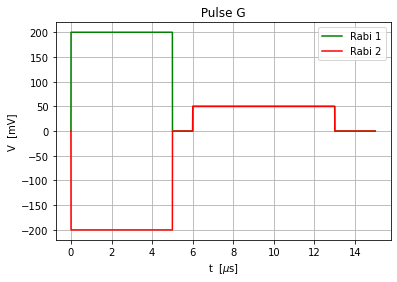

In [14]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(ti,pl,'-g',label= 'Rabi 1')
plt.plot(mti,mpl,'-r',label= 'Rabi 2')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [$\mu$s]')
ax.set_title(' Pulse G ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [10]:
Pulses_List

[{'Name': 'Rabi',
  'Amplitude': 200,
  'Start time': 1e-10,
  'End time': 2e-10,
  'Start Duration': 5,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0},
 {'Name': 'Probe1',
  'Amplitude': 50,
  'Start time': 6,
  'End time': 20,
  'Start Duration': 7,
  'End Duration': 9,
  'Sweep time': 1,
  'Sweep Duration': 0}]

# Sending the Pulse information to the instrumet, TRAC subsystem

In [124]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored segments in the instrument

14

In [125]:
#Segment for Rabi1
M8190A.write('TRAC1:IQIM 1, "C:\\Users\\a.hernandez.de.la.ve\\Documents\\GitHub\\STM\\M8190\\Puls1.csv", CSV, BOTH, ON, ALEN')
M8190A.write('TRAC1:NAME 1, "Positive Pump"')

30

In [126]:
#Segment for Rabi2
M8190A.write('TRAC1:IQIM 2, "C:\\Users\\a.hernandez.de.la.ve\\Documents\\GitHub\\STM\\M8190\\Puls2.csv", CSV, BOTH, ON, ALEN')
M8190A.write('TRAC1:NAME 2, "Negative Pump"')

30

In [71]:
M8190A.query('TRAC:NAME? 2')

'"Negative Pump"'

In [113]:
M8190A.query('TRAC1:CAT?') #catalogue of the corresponding traces stored in memory

'1,108000,2,108000'

In [64]:
M8190A.write(':TRAC1:SEL 1') 
M8190A.write('INIT:IMM')

9

In [65]:
M8190A.write('ABOR')

5

# SEQUENCES

In [114]:
M8190A.write('FUNC1:MODE STS')

15

In [128]:
M8190A.write('FUNC1:MODE STS') 
M8190A.query('SEQ1:DEF:NEW? 2') #Defining the length (numbrer of table steps) of the Sequence
M8190A.query('SEQ:CAT?')

'0,2'

In [127]:
M8190A.write('SEQ1:DEL:ALL')

13

In [117]:
M8190A.query('SEQ:CAT?')

'0,2'

In [81]:
#Understanding the structure of the SEQ:DATA command

#M8190A.write('[:SOURce]:SEQuence[1|2]:DATA <sequence_id>,<step>,[<value>,<value>,…|<data block>] <segment_id>, <loop_count>,<advance_mode>,<marker_enable>, <start_addr>,<end_addr>

#M8190A.query('[:SOURce]:SEQuence[1|2]:DATA? <sequence_id>,<step>,<length>')

In [129]:
#This! Loading Segment 1 to step 0 of Sequence 0
M8190A.write('SEQ1:DATA 0,0,1,2,0,1,0,#hFFFFFFFF')

35

In [130]:
#Loading Segment 2 to step 1 of Sequence 0
M8190A.write('SEQ1:DATA 0,1,2,2,0,1,0,#hFFFFFFFF')

35

In [120]:
#The query form returns for a given sequence-id and step the segment data items (segment-id, loop-count, advance-mode, marker-enable, start-addr, end-addr).
#Getting this from the sequence generated via software

M8190A.query('SEQ1:DATA? 0,0,2')

'1,2,0,1,0,107999,2,2,0,1,0,107999'

In [131]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [99]:
M8190A.write('STAB1:SEQ:SEL 0')

16

In [132]:
M8190A.write('INIT:IMM')

9

In [123]:
M8190A.write('ABOR')

5

# Marker Subsystem

Import the marker sample data through cvs with the following order:

" M8190A User’s Guide 287
CSV

_ Normalized values (-1.0 .. +1.0) and markers in comma delimited format. The file can contain either 1 (waveform data for channel 1), 2 (waveform data for channel 1 & 2), 3 (waveform data, sample marker, sync marker for channel 1) or 6 (waveform data, sample marker, sync marker for channel 1 and 2) columns. If the file contains data for two channels, it will be treated as IQ file._

While trying to write a sinus function throught the marker channel:

_"-300,"Device-specific error;CH1: Error in file ""Puls1.csv""(line: 1): Marker data ""-1.00E-10"" is not valid. Marker data can be either 1 or 0."'"_


In [20]:
mrker= np.array([np.sin(x) for x in ti] )

In [10]:
snx = np.linspace(0,108000,1)

In [17]:
#Pulse Sequence1
pl, ti = Sweep(Pulses_List,10,0,15,108000)


In [21]:
len(mrker)

108000

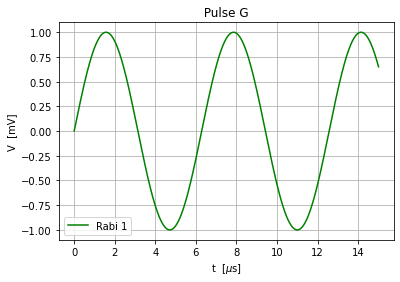

In [23]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(ti,mrker,'-g',label= 'Rabi 1')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [$\mu$s]')
ax.set_title(' Pulse G ')
ax.legend(loc=0)
plt.show()

In [24]:
np.savetxt("MrkrSn.csv",mrker, delimiter = ",")

In [11]:
len(snx)

1

In [33]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [35]:
M8190A.write('MARK1:SAMP:VOLT:AMPL 0.3')

25

In [36]:
M8190A.query('MARK1:SAMP:VOLT:AMPL?')

'3.00000000000000E-01'

In [37]:
M8190A.query('MARK1:SYNC:VOLT:AMPL?')

'5.00000000000000E-01'

ARM / Trigger sub system

In [38]:
M8190A.query('ARM:DEL?')

'0.00000000000000E+00'

In [ ]:
M8190A.write('ROSC:SOUR INT')  

In [30]:
#pp204

M8190A.write('ARM:TRIG:SOUR INT')

18

In [ ]:
M8190A.write('TRIG:BEG1:HWD ON')

In [32]:
M8190A.query(':TRIG:SOUR:ENAB?')

'TRIG'

In [ ]:
M8190A.write('ARM:TRIG:FREQ 15000')

In [31]:
#min 0.1Hz, max 30Mhz

M8190A.query('ARM:TRIG:FREQ?')

'1.00000000000000E+00'

In [ ]:
:TRIG:BEG1:HWD OFF


In [39]:
M8190A.write('TRIG:BEG1 ')

11

In [34]:
M8190A.query('ROSC:SOUR:CHEC? INT')

'1'

In [40]:
M8190A.query('STAT:QUES:SEQ?')

'0'

### Animation

In [22]:
%matplotlib notebook
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  Whe iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P

<IPython.core.display.Javascript object>

## To Do:
1. Code a "Rescale voltage program" to the obtain the dserided pulse amplitude by the given voltage output of the instrument. $\checkmark$
2. Calculate the  $\Delta \tau$ and study it's relation with the sample size and sampling rate, code this relation so we can get this parameters by any given  $\Delta \tau$. Partly $\checkmark$
3. Rewrite the code, adding a dictionary for the settings of the instrument, the renormalization of the Voltage $\checkmark$ and putting the pulse function in terms of $\Delta \tau$ and t $\checkmark$
4. Implement basic sequences, then implement the intended sequence of the future experiment

In [72]:
def Param(t,Δt):

    """This function gives the sample size N and the sampling rate Sr to be used for proper 
        pulse time scale.
        
        This function takes the desired total pulse time length and the desired time resolution
        and outputs the corresponding Sapmle size N to be used in the Sweeping function and it 
        also gives the Sample rate Sr to be set in the AWG, in order to get the proper
        time scale within the Pulse from the AWG. Everything should be in the correct units
    """
    #for the sampling rate we have 
    sr=(Δt)**-1

    #for the sample size N
    N=t*sr 

    return N,sr


In [74]:
Param(15e-6,_)

(108000.0, 7200000000.0)

# Misc. SCPI commands

In [ ]:
M8190A.query('SEQ:FREE?')

In [ ]:
M8190A.query('FUNC1:MODE?')

In [110]:
M8190A.query('MMEM:CAT?')

'117502717952,381959192576,"desktop.ini,,402","M8190A Queries.xlsx,,9966","[Custom Office Templates],,","[GitHub],,","[Keysight],,","[My Music],,","[My Pictures],,","[My Videos],,","[Notebooks],,","[Python Scripts],,","[Remote Assistance Logs],,"'

In [109]:
M8190A.query('SYST:SET?')

'#45950<setting type="setup"><pin name="CHANNEL 1"><attribute name="ArmMode" value="0" /><attribute name="CarrierFrequencyFractional" value="0" /><attribute name="CarrierFrequencyIntegral" value="2000000000" /><attribute name="CarrierPhaseOffset" value="0" /><attribute name="CarrierScale" value="1" /><attribute name="ChannelDelay" value="0" /><attribute name="ChannelDelayCoarse" value="0" /><attribute name="ChannelsCoupled" value="0" /><attribute name="ContinuousMode" value="1" /><attribute name="DisableHwDynamicSelect" value="0" /><attribute name="DisableHwEnable" value="0" /><attribute name="DisableHwEvent" value="0" /><attribute name="DisableHwTrigger" value="0" /><attribute name="DynamicSelect" value="0" /><attribute name="EnableMarker" value="1" /><attribute name="FunctionMode" value="1" /><attribute name="GatedMode" value="0" /><attribute name="OutputBalance" value="0" /><attribute name="OutputNormalState" value="1" /><attribute name="OutputRoute" value="1" /><attribute name="Red

In [87]:
M8190A.query('*OPC?') #this is for checking that the previous commands were completed

'1'

In [47]:
M8190A.write('*CLS')

5

In [136]:
M8190A.write('*RST') #Reseting the instrument to factory settings

5

In [98]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored segments in the instrument

14

In [133]:
M8190A.write('ABOR') #self explanatory

5

Sequences are visualized in Tables, each table entry corresponds to a segment.

Users Manaual page 251:

_"Sequences are made of a number of arbitrary waveforms, which can be linked and looped in user-programmable order. Sequences are generated from waveforms stored in the waveform memory as memory segments."_

A segment corresponds to a waveform (just one?), i.e. some sample data with a corresponding sampling rate frecuency.

:TRAC subsystem to generate segments ($\checkmark$)

:SEQ subsystem to generate sequences.

Trigger for seq A and advance for seq b ??

Internal Trigger Generator

reference oscillator


usual data loaded, internal frecuency set at 15 kHz, sequence is repeted after a time interval of roughly 52us, below this internal frecuency, there is only one sequence displayed.

Advancent/ event triggering due to internal clock related to marker syncronization?

In [42]:
M8190A.query('OUTP:ROUT?')

'DC'

Lock in techniq: Measure the amplitude $A$ of a signal surrounded by noice. You need to know the frecuency of this signal and the phase. Multiply to the noicy output a reference signal $B \cos(\omega t)$ whose frecuency correspond to the the same frecency of the signal to be measured. The result of this multiplication consist in an harmonic component + a DC component.

After averagin in time this result, the harmonic component will cancel out and the DC component will yield the value $\frac{1}{2} AB \cos\phi$ where $\phi$ is the relative phase between the signal to be measured and the reference signal